In [7]:
import pandas as pd
import numpy as np

import mnist
from tensorflow import keras

from tensorflow.keras.layers import Dense, Dropout, Flatten

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

import os

import cv2

# 데이터 불러오기

In [8]:
# 파일에 있는 이미지 불러오기
train_Dir ="./mnist/trainingSet/"
train_folder_list = np.array(os.listdir(train_Dir))
train_folder_list

img_size = 48
train_images = []
train_labels = []
for index in range(0,len(train_folder_list)):
    path = os.path.join(train_Dir, train_folder_list[index])
    path = path + "/"
    img_list = os.listdir(path)
    print(len(img_list))

    for img in img_list :
        img_path = os.path.join(path, img)
        try : 
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img,(img_size, img_size))
            train_images.append(new_img)
            train_labels.append(index)
        except :
            pass

4133
4684
4176
4350
4071
3795
4137
4401
4063
4188


In [12]:
# 파일에 있는 이미지 불러오기
test_Dir ="./mnist/testSet/"
test_folder_list = np.array(os.listdir(test_Dir))
test_folder_list

img_size = 48
test_images = []
test_labels = []
for index in range(0,len(test_folder_list)):
    path = os.path.join(test_Dir, test_folder_list[index])
    path = path + "/"
    img_list = os.listdir(path)
    print(len(img_list))

    for img in img_list :
        img_path = os.path.join(path, img)
        try : 
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img,(img_size, img_size))
            test_images.append(new_img)
            test_labels.append(index)
        except :
            pass

20
20
20
20
20
20
20
20
20
20


In [13]:
print(len(train_images))
print(len(train_labels))
print(len(test_images))
print(len(test_labels))

41997
41997
200
200


In [14]:
# 이미지 정규화
for i in range(0,len(train_images)):
    train_images[i] = (train_images[i]/255)
for i in range(0,len(test_images)):
    test_images[i] = (test_images[i]/255)

In [15]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# 모델생성

In [16]:
# input layer를 위한 설정
inputShape = train_images[0].shape
inputShape

(48, 48)

In [17]:
# output layer를 위한 설정
nCalss = len(np.unique(train_labels))
nCalss

10

In [18]:
model = Sequential()
# input layer
model.add(Flatten(input_shape = inputShape))
# hidden layer
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=16, activation="relu"))
# output layer
model.add(Dense(units=nCalss, activation="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 16)                36880     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 37,322
Trainable params: 37,322
Non-trainable params: 0
_________________________________________________________________


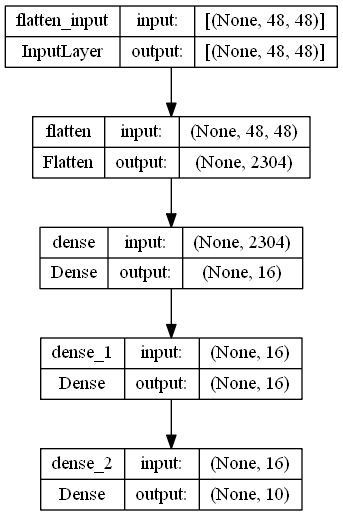

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = "model_plot.png",
           show_shapes=True,
           show_layer_names = True)

# 모델 컴파일

In [21]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [22]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

In [23]:
train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

In [24]:
history = model.fit(x = train_images,
                    y = train_labels_one_hot,
                    epochs = 10,
                    batch_size = 32,
                    validation_split = 0.2)

Epoch 1/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.3256 - accuracy: 0.9079 - val_loss: 13.7807 - val_accuracy: 0.0165
Epoch 2/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1713 - accuracy: 0.9487 - val_loss: 14.8586 - val_accuracy: 0.0164
Epoch 3/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1457 - accuracy: 0.9568 - val_loss: 16.6966 - val_accuracy: 0.0158
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1268 - accuracy: 0.9618 - val_loss: 18.0937 - val_accuracy: 0.0161
Epoch 5/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1134 - accuracy: 0.9653 - val_loss: 18.6221 - val_accuracy: 0.0168
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1059 - accuracy: 0.9678 - val_loss: 20.1952 - val_accuracy: 0.0171
Epoch 7/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0943 - accuracy: 0.9714 - val_loss: 22.2757 - val_ac

### C-1. 모델 추론

In [25]:
model.evaluate(test_images, test_labels_one_hot)

7/7 [==============================] - 0s 2ms/step - loss: 5.2970 - accuracy: 0.7750


[5.297000885009766, 0.7749999761581421]

### 에측

In [26]:
test_images.shape

(200, 48, 48)

In [32]:
# 카톡에서 다운받아서 할것
testImg = cv2.imread("./imageset/img_18.jpg", cv2.IMREAD_GRAYSCALE)

In [33]:
type(testImg)

numpy.ndarray

In [34]:
testImg.shape

(28, 28)

In [35]:
import matplotlib.pyplot as plt

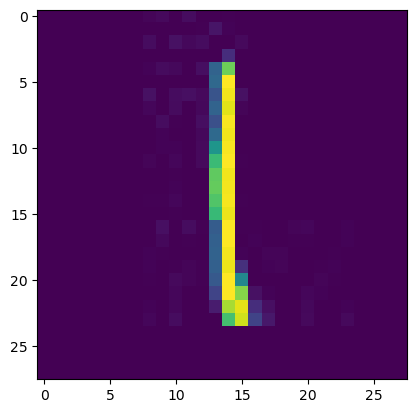

In [36]:
plt.imshow(testImg)

In [37]:
testImg.shape

(28, 28)

In [38]:
testImg = testImg.astype(float)

In [39]:
testImg = testImg/255.0

In [40]:
# 이미지 사이즈 변경
# testImg = testImg.resize((img_size,img_size)) 이 경우 from PIL import Image을 선언해야함
testImg = cv2.resize(testImg, (img_size, img_size))
# testImg = cv2.resize(testImg, dsize=(img_size,img_size))

In [41]:
testImg.shape

(48, 48)

In [42]:
testImg = testImg.reshape(1,img_size,img_size)

In [43]:
answer = model.predict(testImg)

1/1 [==============================] - 0s 81ms/step


In [44]:
result = np.argmax(answer)

In [45]:
result

1